In [1]:
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt

etc = pd.read_csv('youtube_trot2.csv',encoding='utf-8')


In [2]:
len(etc)


265

In [3]:
etc.head(3)

,Unnamed: 0,ID,Comment
0,0,용꼬리용용,장윤정박현빈잔소리보고오신분ㅋㅋㅋㅋㅋㅋ
1,1,이지혜,근데무대도진짜뜨거워보임
2,2,유현준,지옥유황불구덩이에서존나신난꼬마악마의스페셜무대같다ㅋㅋㅋ


In [4]:
etc2=list(etc.Comment)
etc2[0:2]

['장윤정박현빈잔소리보고오신분ㅋㅋㅋㅋㅋㅋ', '근데무대도진짜뜨거워보임']

In [5]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in etc2:
    clean = strip_punctuation(sent)
    clean_title.append(clean)
    
clean_title[0:1]

['장윤정박현빈잔소리보고오신분ㅋㅋㅋㅋㅋㅋ']

In [6]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

In [7]:
import time
import datetime
start = time.time()

In [8]:
dataset = []
for i in range(len(clean_title)):
    dataset.append(twitter_tag.nouns(re.sub('[^가-힣a-zA-Z\s]','',clean_title[i])))


sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times=times[0]
print(times)

0:03:35


In [9]:
from gensim import corpora, models 
import gensim

In [10]:
high_score_reviews = dataset

In [11]:
high_score_reviews = [[y for y in x if not len(y)==1]
                       for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus=[dictionary.doc2bow(text) for text in high_score_reviews]

In [12]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = gensim.models.LdaModel(corpus,num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score_reviews,dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


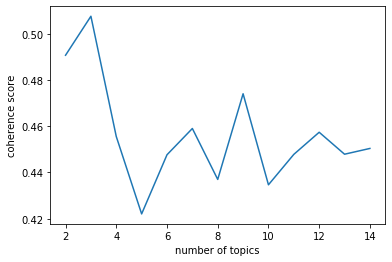

In [13]:
x = range(2,15)
plt.plot(x,coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

In [14]:
import matplotlib.pyplot as plt
perplexity_values=[]
for i in range(2,20):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

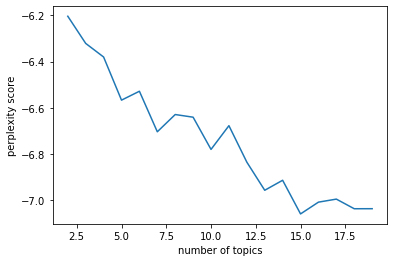

In [15]:
x=range(2,20)
plt.plot(x,perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

In [16]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=9,alpha=0.2,id2word = dictionary)

In [17]:
ldamodel.print_topics(num_words=20)

[(0,
  '0.102*"박현빈" + 0.087*"노래" + 0.033*"홍준표" + 0.021*"진짜" + 0.021*"진정" + 0.014*"완전" + 0.014*"행사" + 0.014*"엉덩이" + 0.014*"신분" + 0.014*"메들리" + 0.010*"앵콜" + 0.009*"여기" + 0.009*"가수" + 0.007*"추천" + 0.007*"최고" + 0.007*"보고" + 0.007*"모습" + 0.007*"김태우" + 0.007*"방송" + 0.007*"스트레스"'),
 (1,
  '0.059*"노래" + 0.047*"박현빈" + 0.028*"현빈" + 0.026*"모습" + 0.019*"아주" + 0.019*"그냥" + 0.019*"진짜" + 0.016*"물의" + 0.013*"반주" + 0.013*"예전" + 0.013*"최고" + 0.009*"점사" + 0.009*"기반" + 0.009*"알라딘" + 0.009*"트리" + 0.009*"성문" + 0.009*"깜짝" + 0.009*"확인" + 0.008*"일찍" + 0.008*"신전"'),
 (2,
  '0.018*"사랑" + 0.015*"박현빈" + 0.012*"가지" + 0.012*"이성우" + 0.012*"아버지" + 0.012*"진짜" + 0.012*"램프" + 0.012*"무대" + 0.012*"제폰" + 0.012*"어도" + 0.012*"사이" + 0.011*"하나로" + 0.011*"모양" + 0.011*"일요일" + 0.011*"신전" + 0.011*"깜짝" + 0.011*"확인" + 0.011*"사과" + 0.010*"트리" + 0.010*"지금"'),
 (3,
  '0.056*"박현빈" + 0.039*"노래" + 0.028*"오빠" + 0.021*"한번" + 0.020*"계속" + 0.015*"장윤정" + 0.015*"정말" + 0.014*"대가" + 0.014*"히트" + 0.008*"무대" + 0.008*"현빈" + 0.008*"노래방" + 0.008*"고생" +

In [18]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.132608 -0.094477       1        1  17.949551
2     -0.157569 -0.019323       2        1  15.824088
1     -0.064644  0.096119       3        1  12.554015
6     -0.085810 -0.106851       4        1  10.702397
3      0.077303 -0.003723       5        1  10.654254
0      0.048469  0.081007       6        1  10.353644
7      0.029565  0.034741       7        1   9.215676
5      0.031192  0.047311       8        1   7.294411
4     -0.011115 -0.034804       9        1   5.451956, topic_info=    Term       Freq      Total Category  logprob  loglift
28    노래  30.000000  30.000000  Default  30.0000  30.0000
82    현빈  12.000000  12.000000  Default  29.0000  29.0000
0    박현빈  36.000000  36.000000  Default  28.0000  28.0000
91    오빠   8.000000   8.000000  Default  27.0000  27.0000
241   추천   7.000000   7.000000  Default  26.0000  26.0000
..   ...        ...        ...      ...      ...      ...
31    가수   0.599964   7.125972   Topic9  -4.3609   0.4346
425   너울   0.083659   1.397806   Topic9  -6.3311   0.0933
431   한류   0.083155   1.397987   Topic9  -6.3371   0.0871
82    현빈   0.597342  12.837912   Topic9  -4.3653  -0.1585
0    박현빈   0.647142  36.566689   Topic9  -4.2852  -1.1251

[448 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
88        5  0.777437    가대
31        1  0.420995    가수
31        4  0.140332    가수
31        6  0.140332    가수
31        8  0.140332    가수
...     ...       ...   ...
357       4  0.372173  흥부박터
204       9  0.838832  히든싱어
17        3  0.317430    히트
17        5  0.317430    히트
17        9  0.317430    히트

[490 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 2, 7, 4, 1, 8, 6, 5])